In [226]:
#Load necessary library
import numpy as np
from scipy import misc
import tensorflow as tf
import os
import matplotlib.pyplot as plt
import h5py
import time
# import cv2

In [227]:
#This is the function to get the bouding box position
def get_box_data(index, hdf5_data):
    """
    get `left, top, width, height` of each picture
    :param index:
    :param hdf5_data:
    :return:
    """
    meta_data = dict()
    meta_data['height'] = []
    meta_data['label'] = []
    meta_data['left'] = []
    meta_data['top'] = []
    meta_data['width'] = []

    def print_attrs(name, obj):
        vals = []
        if obj.shape[0] == 1:
            vals.append(obj[0][0])
        else:
            for k in range(obj.shape[0]):
                vals.append(int(hdf5_data[obj[k][0]][0][0]))
        meta_data[name] = vals

    box = hdf5_data['/digitStruct/bbox'][index]
    hdf5_data[box[0]].visititems(print_attrs)
    return meta_data

def get_name(index, hdf5_data):
    name = hdf5_data['/digitStruct/name']
    return ''.join([chr(v[0]) for v in hdf5_data[name[index][0]].value])

In [228]:
#Read image from folder
n=100
# os.chdir('C:\\Users\\cpe\\Documents\\Columbia\\ECBM4060 Neural Network Deep L\\project')
root_dir = os.getcwd()
X_train = []
#     train_label = np.zeros((class_size*n_class)).astype(int)
#     test_data = np.zeros((test_size, 32,32,3)).astype(int)
path = './train'
os.chdir(path)
            
for i in range(1,n+1):
    name = '{}.png'.format(i)
    img = misc.imread(name)
    X_train.append(img)
os.chdir(root_dir)
root_dir

/home/ecbm4040/miniconda3/envs/dlenv/lib/python3.6/site-packages/ipykernel_launcher.py:13: DeprecationWarning: `imread` is deprecated!
`imread` is deprecated in SciPy 1.0.0, and will be removed in 1.2.0.
Use ``imageio.imread`` instead.
  del sys.path[0]


'/home/ecbm4040/ecbm4040project'

(350, 741, 3)


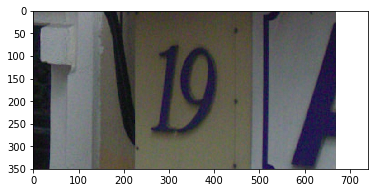

In [229]:
#Original image
plt.imshow(X_train[0])
print(X_train[0].shape)

In [230]:
# Crop image to 54*54*3 format aroud street number

mat_data = h5py.File('./train/digitStruct.mat')
size = mat_data['/digitStruct/name'].size

label_Final = []
Pic_crop_Final = []
for i in range(n):
    Array = np.array(X_train[i])
    pic = get_name(i, mat_data)
    box = get_box_data(i, mat_data)
    label = box['label']
    label_Final.append(''.join(str(int(x%10)) for x in label))

    Test = label_Final[0]

    #Increase location by 30%
    
    H = int(round((max(box['top'])+max(box['height'])) *1.03))
    L = int(round (min(box['left']) *(0.97)))
    if L<0:
        L =0
    T = int(round (min(box['top'])*(0.97)))
    if T<0:
        T = 0
    W = int(round((max (box ['left'])+ max(box['width']))*1.03))
   
    # Combine the boxes together
    Pic_crop = Array [T:H,L:W]

    res_Pic_crop=misc.imresize(Pic_crop,(54,54,3))

    Pic_crop_Final.append(res_Pic_crop)


/home/ecbm4040/miniconda3/envs/dlenv/lib/python3.6/site-packages/ipykernel_launcher.py:31: DeprecationWarning: `imresize` is deprecated!
`imresize` is deprecated in SciPy 1.0.0, and will be removed in 1.2.0.
Use ``skimage.transform.resize`` instead.


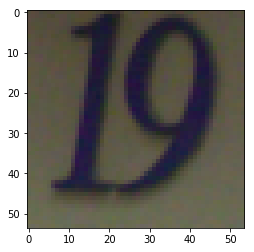

In [231]:
plt.imshow(Pic_crop_Final[0])

In [232]:
label_Final[:10]

['19', '23', '25', '93', '31', '33', '28', '744', '128', '16']

In [233]:
# Encode street number to 5-digit label and length label
label=[]
length=[]
for i in range(len(label_Final)):
    label.append([int(x) for x in label_Final[i]])
    length.append(len(label[-1]))


In [234]:
print(label)
print(length)

[[1, 9], [2, 3], [2, 5], [9, 3], [3, 1], [3, 3], [2, 8], [7, 4, 4], [1, 2, 8], [1, 6], [2, 3], [6, 3], [4, 2], [5, 8], [1, 6], [2, 3], [7, 9], [5, 3], [2, 2, 2], [6, 2], [2], [5, 1, 5], [4, 7], [8, 9], [6, 0, 1], [2, 4], [5, 6], [5, 2], [1, 3, 2], [1, 4], [6, 3, 8], [4, 3], [1, 4], [4, 2], [6], [4, 4], [1, 1], [1, 7], [3, 1], [2, 0], [4, 2], [2, 5, 1], [2, 9], [2, 0, 4], [1, 0], [3, 2, 7], [2, 4], [4, 6], [8, 1, 7], [1, 0, 3], [9, 1], [3, 5], [9, 3], [1, 1], [1, 1, 3, 7], [5, 6], [2, 1, 5], [1, 1], [2], [4, 7], [5], [3, 2], [4, 3], [2, 9], [5, 8], [9, 5], [1, 0], [5, 4, 2], [4, 4], [3, 1], [2, 3, 8, 6], [1, 5], [3], [3, 3], [1, 8], [9, 8], [7, 3, 9], [1, 3, 8], [1, 9, 2, 2], [2, 2], [7, 4], [4, 5], [6, 0], [3], [1, 7], [3, 5], [1, 7], [5], [1, 8], [1, 6, 4], [1, 9, 3], [3, 5], [1, 7], [1, 2], [1, 0, 4, 4], [1, 8], [3, 6], [1, 2, 0], [2], [1, 0, 9]]
[2, 2, 2, 2, 2, 2, 2, 3, 3, 2, 2, 2, 2, 2, 2, 2, 2, 2, 3, 2, 1, 3, 2, 2, 3, 2, 2, 2, 3, 2, 3, 2, 2, 2, 1, 2, 2, 2, 2, 2, 2, 3, 2, 3, 2, 3, 

In [235]:
thats_hot=np.zeros((n,5,11), dtype=int)
for i in range(n):
    for j in range(len(label[i])):
        thats_hot[i][j][label[i][j]]=1
        for j in range(len(label[i]),5):
            thats_hot[i][j][10]=1

In [236]:
print(thats_hot[:3])
print(len(thats_hot))

[[[0 1 0 0 0 0 0 0 0 0 0]
  [0 0 0 0 0 0 0 0 0 1 0]
  [0 0 0 0 0 0 0 0 0 0 1]
  [0 0 0 0 0 0 0 0 0 0 1]
  [0 0 0 0 0 0 0 0 0 0 1]]

 [[0 0 1 0 0 0 0 0 0 0 0]
  [0 0 0 1 0 0 0 0 0 0 0]
  [0 0 0 0 0 0 0 0 0 0 1]
  [0 0 0 0 0 0 0 0 0 0 1]
  [0 0 0 0 0 0 0 0 0 0 1]]

 [[0 0 1 0 0 0 0 0 0 0 0]
  [0 0 0 0 0 1 0 0 0 0 0]
  [0 0 0 0 0 0 0 0 0 0 1]
  [0 0 0 0 0 0 0 0 0 0 1]
  [0 0 0 0 0 0 0 0 0 0 1]]]
100


In [237]:
#One hot encode length
hot_length = np.zeros((len(length), 7),dtype=int)
hot_length[np.arange(len(length),), length] = 1

In [238]:
print(hot_length[:3])
print(len(hot_length))

[[0 0 1 0 0 0 0]
 [0 0 1 0 0 0 0]
 [0 0 1 0 0 0 0]]
100


In [249]:
#Split to train and validation set and convert input to numpy array
n_train = int(n*0.8)
x_train = np.array(Pic_crop_Final[:n_train])
x_val = np.array(Pic_crop_Final[n_train:])
#training label need one-hot encoded format
label_train_hot= np.array(thats_hot[:n_train])
length_train_hot = np.array(hot_length[:n_train])
#validation label is original format
label_val=label[n_train:]
length_val = length[n_train:]
label_train= label[:n_train]
length_train = length[:n_train]
print(type(y_label))
print(type(x_train))
print(label_train_hot.shape)
print(x_train.shape)
print(type(label_val))
print(x_val.shape)
print(label_train[0])
print(length_train[0])
print(label_val)
print(length_val[0])

<class 'numpy.ndarray'>
<class 'numpy.ndarray'>
(80, 5, 11)
(80, 54, 54, 3)
<class 'list'>
(20, 54, 54, 3)
[1, 9]
2
[[7, 4], [4, 5], [6, 0], [3], [1, 7], [3, 5], [1, 7], [5], [1, 8], [1, 6, 4], [1, 9, 3], [3, 5], [1, 7], [1, 2], [1, 0, 4, 4], [1, 8], [3, 6], [1, 2, 0], [2], [1, 0, 9]]
2


In [240]:
def model (x, length_labels, digits_labels, drop_rate=0.5):


    with tf.variable_scope('hidden1'):
        conv = tf.layers.conv2d(x, filters=48, kernel_size=[5, 5], padding='same')
        norm = tf.layers.batch_normalization(conv)
        activation = tf.nn.relu(norm)
        pool = tf.layers.max_pooling2d(activation, pool_size=[2, 2], strides=2, padding='same')
        hidden1 = pool  # 27 * 27 * 48
        # print(hidden1.shape)

    with tf.variable_scope('hidden2'):
        conv = tf.layers.conv2d(hidden1, filters=64, kernel_size=[5, 5], padding='same')
        norm = tf.layers.batch_normalization(conv)
        activation = tf.nn.relu(norm)
        pool = tf.layers.max_pooling2d(activation, pool_size=[2, 2], strides=1, padding='same')
        hidden2 = pool  # 27 * 27 * 64
        # print(hidden2.shape)

    with tf.variable_scope('hidden3'):
        conv = tf.layers.conv2d(hidden2, filters=128, kernel_size=[5, 5], padding='same')
        norm = tf.layers.batch_normalization(conv)
        activation = tf.nn.relu(norm)
        pool = tf.layers.max_pooling2d(activation, pool_size=[2, 2], strides=2, padding='same')
        hidden3 = pool  # 14 * 14 * 128
        # print(hidden3.shape)

    with tf.variable_scope('hidden4'):
        conv = tf.layers.conv2d(hidden3, filters=160, kernel_size=[5, 5], padding='same')
        norm = tf.layers.batch_normalization(conv)
        activation = tf.nn.relu(norm)
        pool = tf.layers.max_pooling2d(activation, pool_size=[2, 2], strides=1, padding='same')
        hidden4 = pool  # 14 * 14 *160
        # print(hidden4.shape)

    with tf.variable_scope('hidden5'):
        conv = tf.layers.conv2d(hidden4, filters=192, kernel_size=[5, 5], padding='same')
        norm = tf.layers.batch_normalization(conv)
        activation = tf.nn.relu(norm)
        pool = tf.layers.max_pooling2d(activation, pool_size=[2, 2], strides=2, padding='same')
        hidden5 = pool  # 7 * 7 * 192
        # print(hidden5.shape)

    with tf.variable_scope('hidden6'):
        conv = tf.layers.conv2d(hidden5, filters=192, kernel_size=[5, 5], padding='same')
        norm = tf.layers.batch_normalization(conv)
        activation = tf.nn.relu(norm)
        pool = tf.layers.max_pooling2d(activation, pool_size=[2, 2], strides=1, padding='same')
        hidden6 = pool  # 7 * 7 * 192
        # print(hidden6.shape)

    with tf.variable_scope('hidden7'):
        conv = tf.layers.conv2d(hidden6, filters=192, kernel_size=[5, 5], padding='same')
        norm = tf.layers.batch_normalization(conv)
        activation = tf.nn.relu(norm)
        pool = tf.layers.max_pooling2d(activation, pool_size=[2, 2], strides=2, padding='same')
        hidden7 = pool  # 4 * 4 * 192
        # print(hidden7.shape)

    with tf.variable_scope('hidden8'):
        conv = tf.layers.conv2d(hidden7, filters=192, kernel_size=[5, 5], padding='same')
        norm = tf.layers.batch_normalization(conv)
        activation = tf.nn.relu(norm)
        pool = tf.layers.max_pooling2d(activation, pool_size=[2, 2], strides=1, padding='same')
        hidden8 = pool  # 4 * 4 * 192

    flatten = tf.reshape(hidden8, [-1, 4 * 4 * 192])

    with tf.variable_scope('hidden9'):
        dense = tf.layers.dense(flatten, units=3072, activation=tf.nn.relu)
        dropout = tf.layers.dropout(dense, rate=drop_rate)
        hidden9 = dropout

    with tf.variable_scope('hidden10'):
        dense = tf.layers.dense(hidden9, units=3072, activation=tf.nn.relu)
        dropout = tf.layers.dropout(dense, rate=drop_rate)
        hidden10 = dropout

    with tf.variable_scope('digit_length'):
        dense = tf.layers.dense(hidden10, units=7)
        length = dense

    with tf.variable_scope('digit1'):
        dense = tf.layers.dense(hidden10, units=11)
        digit1 = dense

    with tf.variable_scope('digit2'):
        dense = tf.layers.dense(hidden10, units=11)
        digit2 = dense

    with tf.variable_scope('digit3'):
        dense = tf.layers.dense(hidden10, units=11)
        digit3 = dense

    with tf.variable_scope('digit4'):
        dense = tf.layers.dense(hidden10, units=11)
        digit4 = dense

    with tf.variable_scope('digit5'):
        dense = tf.layers.dense(hidden10, units=11)
        digit5 = dense

    length_logits, digits_logits = length, tf.stack([digit1, digit2, digit3, digit4, digit5], axis=1)

    length_cross_entropy = tf.reduce_mean(
        tf.nn.softmax_cross_entropy_with_logits (labels=length_labels, logits=length_logits))
    digit1_cross_entropy = tf.reduce_mean(
        tf.nn.softmax_cross_entropy_with_logits (labels=digits_labels[:, 0], logits=digits_logits[:, 0, :]))
    digit2_cross_entropy = tf.reduce_mean(
        tf.nn.softmax_cross_entropy_with_logits (labels=digits_labels[:, 1], logits=digits_logits[:, 1, :]))
    digit3_cross_entropy = tf.reduce_mean(
        tf.nn.softmax_cross_entropy_with_logits (labels=digits_labels[:, 2], logits=digits_logits[:, 2, :]))
    digit4_cross_entropy = tf.reduce_mean(
        tf.nn.softmax_cross_entropy_with_logits (labels=digits_labels[:, 3], logits=digits_logits[:, 3, :]))
    digit5_cross_entropy = tf.reduce_mean(
        tf.nn.softmax_cross_entropy_with_logits (labels=digits_labels[:, 4], logits=digits_logits[:, 4, :]))
    loss = length_cross_entropy + digit1_cross_entropy + digit2_cross_entropy + digit3_cross_entropy + digit4_cross_entropy + digit5_cross_entropy
    
    return length_logits, digits_logits, loss

In [241]:
#predict length and 5 digit based on logits 
def predict (length_logits, digits_logits):
    with tf.name_scope('predict'):
        p_l =tf.log(tf.nn.softmax(length_logits,axis=1))
        p_d1=tf.log(tf.nn.softmax(digits_logits[:, 0, :],axis=1))
        p_d2=tf.log(tf.nn.softmax(digits_logits[:, 1, :],axis=1))
        p_d3=tf.log(tf.nn.softmax(digits_logits[:, 2, :],axis=1))
        p_d4=tf.log(tf.nn.softmax(digits_logits[:, 3, :],axis=1))
        p_d5=tf.log(tf.nn.softmax(digits_logits[:, 4, :],axis=1))

        ps0 = tf.add_n([p_l[:,0]])
        ps1= tf.add_n([p_l[:,1],tf.reduce_max(p_d1,axis = 1)])
        ps2= tf.add_n([p_l[:,2],tf.reduce_max(p_d1,axis = 1),tf.reduce_max(p_d2,axis = 1)])
        ps3= tf.add_n([p_l[:,3],tf.reduce_max(p_d1,axis = 1),tf.reduce_max(p_d2,axis = 1),tf.reduce_max(p_d3,axis = 1)])
        ps4= tf.add_n([p_l[:,4],tf.reduce_max(p_d1,axis = 1),tf.reduce_max(p_d2,axis = 1),tf.reduce_max(p_d3,axis = 1),tf.reduce_max(p_d4,axis = 1)])
        ps5= tf.add_n([p_l[:,5],tf.reduce_max(p_d1,axis = 1),tf.reduce_max(p_d2,axis = 1),tf.reduce_max(p_d3,axis = 1),tf.reduce_max(p_d4,axis = 1),tf.reduce_max(p_d5,axis = 1)])
        ps6= tf.add_n([p_l[:,6],tf.reduce_max(p_d1,axis = 1),tf.reduce_max(p_d2,axis = 1),tf.reduce_max(p_d3,axis = 1),tf.reduce_max(p_d4,axis = 1),tf.reduce_max(p_d5,axis = 1)])

        ps = tf.stack([ps0,ps1, ps2, ps3, ps4, ps5,ps6], axis=1)
        length_predictions =tf.argmax(ps,axis=1)
        
        d1 = tf.argmax(p_d1, axis=1)
        d2 = tf.argmax(p_d2, axis=1)
        d3 = tf.argmax(p_d3, axis=1)
        d4 = tf.argmax(p_d4, axis=1)
        d5 = tf.argmax(p_d5, axis=1)
        digits_prediction = tf.stack([d1, d2, d3, d4, d5], axis=1)

    return length_predictions,digits_prediction

In [243]:
# Generate predicted sequence and calcualate accuracy
def evaluate (length_predictions, digits_predictions, length_label, label):

# Input:  length_label: list of length n
#         label: list of n list, each list is the individual digit
#         digits_predictions: numpy array of predicted 5 digits for each sample

    output_list = []
    num_error = 0
    for i in range(len(length_label)):
        str_pred = np.ndarray.tolist(digits_predictions[i,:length_label[i]])
        output_list.append(str_pred)
        if str_pred != label[i]:
            num_error+=1
    accuracy = (1-num_error/len(length_label))*100
    return output_list, accuracy

In [254]:
#Training
saving_directory = './Desktop/Train/'

tf.reset_default_graph()
with tf.name_scope('inputs'):
    x = tf.placeholder(tf.float32, shape=(None,54,54,3))
    length_labels = tf.placeholder(tf.int64, shape=(None,None,))
    digits_labels =  tf.placeholder(tf.int64, shape=(None,None,None))

num_train = x_train.shape[0]
batch_size = 10
epoches = 200
num_batch = num_train//batch_size
length_logits, digits_logits, loss = model(x, length_labels, digits_labels)

train_step = tf.train.AdamOptimizer(1e-6).minimize(loss)

length_predictions, digits_predictions = predict(length_logits, digits_logits)
iter_total = 0
best_acc = 0
cur_model_name = 'SVHN_{}'.format(int(time.time()))

with tf.Session() as sess:
#     merge = tf.summary.merge_all()
#     writer = tf.summary.FileWriter("log/{}".format(cur_model_name), sess.graph)
    sess.run(tf.initialize_all_variables())
    saver = tf.train.Saver()
    for e in range(epoches):
        print("epoch {} ".format(e + 1))
        for i in range(num_batch):
            iter_total += 1
            choice=np.random.choice(num_train, size=batch_size, replace=False)
            batch_x, batch_digits, batch_length = x_train[choice], thats_hot[choice], hot_length[choice]
            _, length_logits_tf, digits_logits_tf, loss_tf = sess.run([train_step,length_logits, digits_logits, loss],feed_dict={x:batch_x , length_labels:batch_length ,digits_labels:batch_digits})
            

            if iter_total % 1 == 0:
                
            # do validation
                length_tf, digit_tf = sess.run([length_predictions, digits_predictions],feed_dict={x:x_train})
                pred_str, valid_acc = evaluate(length_tf, digit_tf, length_train, label_train)
#                 length_tf, digit_tf = sess.run([length_predictions, digits_predictions],feed_dict={x:x_val})
#                 pred_str, valid_acc = evaluate(length_tf, digit_tf, length_val, label_val)
                print('{} batch training loss: {} validation accuracy : {}%'.format(i,loss_tf,valid_acc))

#                     # save the merge result summary
#                 writer.add_summary(merge_result, iter_total)
                # when achieve the best validation accuracy, we store the model paramters
                if valid_acc > best_acc:
                    best_acc = valid_acc
                    print('Best validation accuracy: {}%'.format(best_acc))
                
                    saver.save(sess, 'model/{}'.format(cur_model_name))
print("Traning ends. The best valid accuracy is {}. Model named {}.".format(best_acc, cur_model_name))



epoch 1 
0 batch training loss: 21.39937973022461 validation accuracy : 0.0%
1 batch training loss: 20.64156723022461 validation accuracy : 0.0%
2 batch training loss: 19.849594116210938 validation accuracy : 0.0%
3 batch training loss: 18.025352478027344 validation accuracy : 0.0%
4 batch training loss: 18.213932037353516 validation accuracy : 0.0%
5 batch training loss: 16.5450496673584 validation accuracy : 0.0%
6 batch training loss: 17.701608657836914 validation accuracy : 0.0%
7 batch training loss: 17.86614990234375 validation accuracy : 0.0%
epoch 2 
0 batch training loss: 17.503725051879883 validation accuracy : 0.0%
1 batch training loss: 15.518308639526367 validation accuracy : 0.0%
2 batch training loss: 15.23796272277832 validation accuracy : 0.0%
3 batch training loss: 15.42965316772461 validation accuracy : 0.0%
4 batch training loss: 13.909557342529297 validation accuracy : 0.0%
5 batch training loss: 13.807798385620117 validation accuracy : 0.0%
6 batch training loss: 

2 batch training loss: 6.088700771331787 validation accuracy : 3.749999999999998%
3 batch training loss: 6.505959987640381 validation accuracy : 3.749999999999998%
4 batch training loss: 7.746557712554932 validation accuracy : 3.749999999999998%
5 batch training loss: 6.49608039855957 validation accuracy : 5.000000000000004%
6 batch training loss: 8.18732738494873 validation accuracy : 5.000000000000004%
7 batch training loss: 5.582582950592041 validation accuracy : 5.000000000000004%
epoch 15 
0 batch training loss: 7.540167808532715 validation accuracy : 6.25%
1 batch training loss: 6.27249002456665 validation accuracy : 6.25%
2 batch training loss: 6.514500617980957 validation accuracy : 6.25%
3 batch training loss: 6.527871608734131 validation accuracy : 6.25%
4 batch training loss: 7.032626628875732 validation accuracy : 6.25%
5 batch training loss: 6.416615009307861 validation accuracy : 6.25%
6 batch training loss: 5.116472244262695 validation accuracy : 6.25%
7 batch training l

5 batch training loss: 7.05567741394043 validation accuracy : 5.000000000000004%
6 batch training loss: 5.952356338500977 validation accuracy : 5.000000000000004%
7 batch training loss: 5.495344638824463 validation accuracy : 5.000000000000004%
epoch 28 
0 batch training loss: 5.332381725311279 validation accuracy : 5.000000000000004%
1 batch training loss: 5.722192764282227 validation accuracy : 5.000000000000004%
2 batch training loss: 5.460580348968506 validation accuracy : 5.000000000000004%
3 batch training loss: 6.409748554229736 validation accuracy : 5.000000000000004%
4 batch training loss: 6.472147464752197 validation accuracy : 5.000000000000004%
5 batch training loss: 6.219585418701172 validation accuracy : 5.000000000000004%
6 batch training loss: 6.670661449432373 validation accuracy : 6.25%
7 batch training loss: 5.760660648345947 validation accuracy : 7.499999999999996%
epoch 29 
0 batch training loss: 5.703769207000732 validation accuracy : 7.499999999999996%
1 batch tr

1 batch training loss: 7.0268940925598145 validation accuracy : 8.750000000000002%
2 batch training loss: 6.657647132873535 validation accuracy : 7.499999999999996%
3 batch training loss: 6.406773567199707 validation accuracy : 7.499999999999996%
4 batch training loss: 7.424178600311279 validation accuracy : 7.499999999999996%
5 batch training loss: 6.6699748039245605 validation accuracy : 7.499999999999996%
6 batch training loss: 5.618472099304199 validation accuracy : 7.499999999999996%
7 batch training loss: 7.2446770668029785 validation accuracy : 7.499999999999996%
epoch 41 
0 batch training loss: 6.800072193145752 validation accuracy : 7.499999999999996%
1 batch training loss: 6.955585479736328 validation accuracy : 7.499999999999996%
2 batch training loss: 5.959588527679443 validation accuracy : 7.499999999999996%
3 batch training loss: 6.078454971313477 validation accuracy : 8.750000000000002%
4 batch training loss: 5.5012431144714355 validation accuracy : 8.750000000000002%
5 

4 batch training loss: 4.9686198234558105 validation accuracy : 7.499999999999996%
5 batch training loss: 5.831585884094238 validation accuracy : 7.499999999999996%
6 batch training loss: 4.925390720367432 validation accuracy : 8.750000000000002%
7 batch training loss: 5.4627156257629395 validation accuracy : 8.750000000000002%
epoch 53 
0 batch training loss: 5.45449161529541 validation accuracy : 8.750000000000002%
1 batch training loss: 5.854714870452881 validation accuracy : 8.750000000000002%
2 batch training loss: 7.727272033691406 validation accuracy : 8.750000000000002%
3 batch training loss: 5.611578464508057 validation accuracy : 9.999999999999998%
4 batch training loss: 5.3432841300964355 validation accuracy : 8.750000000000002%
5 batch training loss: 6.42627477645874 validation accuracy : 8.750000000000002%
6 batch training loss: 6.271000385284424 validation accuracy : 13.749999999999996%
7 batch training loss: 5.714328765869141 validation accuracy : 16.249999999999996%
Bes

3 batch training loss: 4.84356164932251 validation accuracy : 9.999999999999998%
4 batch training loss: 6.55790376663208 validation accuracy : 9.999999999999998%
5 batch training loss: 5.640265464782715 validation accuracy : 9.999999999999998%
6 batch training loss: 5.53278112411499 validation accuracy : 7.499999999999996%
7 batch training loss: 4.931883335113525 validation accuracy : 7.499999999999996%
epoch 66 
0 batch training loss: 7.120490074157715 validation accuracy : 7.499999999999996%
1 batch training loss: 4.7620849609375 validation accuracy : 7.499999999999996%
2 batch training loss: 4.821600437164307 validation accuracy : 7.499999999999996%
3 batch training loss: 6.113786697387695 validation accuracy : 7.499999999999996%
4 batch training loss: 5.1428542137146 validation accuracy : 7.499999999999996%
5 batch training loss: 5.4955153465271 validation accuracy : 7.499999999999996%
6 batch training loss: 5.549133777618408 validation accuracy : 7.499999999999996%
7 batch trainin

1 batch training loss: 5.3501811027526855 validation accuracy : 12.5%
2 batch training loss: 5.011997222900391 validation accuracy : 12.5%
3 batch training loss: 4.32399320602417 validation accuracy : 12.5%
4 batch training loss: 5.655343532562256 validation accuracy : 13.749999999999996%
5 batch training loss: 4.3740739822387695 validation accuracy : 13.749999999999996%
6 batch training loss: 5.5692524909973145 validation accuracy : 13.749999999999996%
7 batch training loss: 4.906360626220703 validation accuracy : 11.250000000000004%
epoch 79 
0 batch training loss: 4.574812889099121 validation accuracy : 13.749999999999996%
1 batch training loss: 6.363598823547363 validation accuracy : 15.000000000000002%
2 batch training loss: 4.248510360717773 validation accuracy : 15.000000000000002%
3 batch training loss: 5.40317440032959 validation accuracy : 15.000000000000002%
4 batch training loss: 4.25499963760376 validation accuracy : 15.000000000000002%
5 batch training loss: 4.18838453292

4 batch training loss: 3.7618167400360107 validation accuracy : 19.999999999999996%
5 batch training loss: 5.252069473266602 validation accuracy : 19.999999999999996%
6 batch training loss: 4.7580084800720215 validation accuracy : 19.999999999999996%
7 batch training loss: 5.312302589416504 validation accuracy : 19.999999999999996%
epoch 91 
0 batch training loss: 4.223382472991943 validation accuracy : 19.999999999999996%
1 batch training loss: 5.213069438934326 validation accuracy : 19.999999999999996%
2 batch training loss: 4.1805500984191895 validation accuracy : 19.999999999999996%
3 batch training loss: 5.318357467651367 validation accuracy : 22.499999999999996%
4 batch training loss: 5.1580610275268555 validation accuracy : 22.499999999999996%
5 batch training loss: 4.673716068267822 validation accuracy : 18.75%
6 batch training loss: 5.731815814971924 validation accuracy : 18.75%
7 batch training loss: 4.869882106781006 validation accuracy : 16.249999999999996%
epoch 92 
0 batc

2 batch training loss: 4.1894049644470215 validation accuracy : 17.500000000000004%
3 batch training loss: 4.300759792327881 validation accuracy : 17.500000000000004%
4 batch training loss: 4.836556911468506 validation accuracy : 17.500000000000004%
5 batch training loss: 5.001748085021973 validation accuracy : 17.500000000000004%
6 batch training loss: 4.180178165435791 validation accuracy : 21.250000000000004%
7 batch training loss: 4.543123245239258 validation accuracy : 22.499999999999996%
epoch 104 
0 batch training loss: 4.491964817047119 validation accuracy : 25.0%
1 batch training loss: 4.296907901763916 validation accuracy : 25.0%
2 batch training loss: 4.176198482513428 validation accuracy : 25.0%
3 batch training loss: 5.093827247619629 validation accuracy : 22.499999999999996%
4 batch training loss: 4.978912353515625 validation accuracy : 23.750000000000004%
5 batch training loss: 4.174473285675049 validation accuracy : 25.0%
6 batch training loss: 4.5127129554748535 valida

1 batch training loss: 5.234410762786865 validation accuracy : 27.500000000000004%
2 batch training loss: 4.107149600982666 validation accuracy : 26.249999999999996%
3 batch training loss: 6.2835540771484375 validation accuracy : 26.249999999999996%
4 batch training loss: 5.176629066467285 validation accuracy : 25.0%
5 batch training loss: 4.454990386962891 validation accuracy : 23.750000000000004%
6 batch training loss: 4.606118202209473 validation accuracy : 22.499999999999996%
7 batch training loss: 4.732121467590332 validation accuracy : 21.250000000000004%
epoch 117 
0 batch training loss: 4.500702857971191 validation accuracy : 22.499999999999996%
1 batch training loss: 4.067043304443359 validation accuracy : 22.499999999999996%
2 batch training loss: 5.085387229919434 validation accuracy : 25.0%
3 batch training loss: 4.161264896392822 validation accuracy : 26.249999999999996%
4 batch training loss: 3.7827513217926025 validation accuracy : 27.500000000000004%
5 batch training lo

0 batch training loss: 3.767648220062256 validation accuracy : 37.5%
1 batch training loss: 4.162201404571533 validation accuracy : 36.25000000000001%
2 batch training loss: 4.483852386474609 validation accuracy : 36.25000000000001%
3 batch training loss: 3.8966777324676514 validation accuracy : 32.49999999999999%
4 batch training loss: 3.5242013931274414 validation accuracy : 32.49999999999999%
5 batch training loss: 5.067134857177734 validation accuracy : 32.49999999999999%
6 batch training loss: 3.9812488555908203 validation accuracy : 30.000000000000004%
7 batch training loss: 4.163936138153076 validation accuracy : 35.0%
epoch 130 
0 batch training loss: 4.446231842041016 validation accuracy : 35.0%
1 batch training loss: 4.368719577789307 validation accuracy : 36.25000000000001%
2 batch training loss: 3.9860875606536865 validation accuracy : 35.0%
3 batch training loss: 4.728809833526611 validation accuracy : 36.25000000000001%
4 batch training loss: 4.7254862785339355 validation

3 batch training loss: 3.048571825027466 validation accuracy : 32.49999999999999%
4 batch training loss: 3.6727216243743896 validation accuracy : 30.000000000000004%
5 batch training loss: 4.643771171569824 validation accuracy : 31.25%
6 batch training loss: 5.274094581604004 validation accuracy : 31.25%
7 batch training loss: 5.136935234069824 validation accuracy : 31.25%
epoch 143 
0 batch training loss: 3.023115396499634 validation accuracy : 32.49999999999999%
1 batch training loss: 3.8633549213409424 validation accuracy : 33.75%
2 batch training loss: 3.4498867988586426 validation accuracy : 37.5%
3 batch training loss: 4.040101051330566 validation accuracy : 36.25000000000001%
4 batch training loss: 4.226451873779297 validation accuracy : 36.25000000000001%
5 batch training loss: 3.370330333709717 validation accuracy : 37.5%
6 batch training loss: 4.5068359375 validation accuracy : 37.5%
7 batch training loss: 3.8248910903930664 validation accuracy : 36.25000000000001%
epoch 144 

7 batch training loss: 4.364204406738281 validation accuracy : 33.75%
epoch 156 
0 batch training loss: 3.533238649368286 validation accuracy : 36.25000000000001%
1 batch training loss: 3.3588247299194336 validation accuracy : 38.74999999999999%
2 batch training loss: 3.3103344440460205 validation accuracy : 40.0%
3 batch training loss: 2.5489113330841064 validation accuracy : 38.74999999999999%
4 batch training loss: 4.30308198928833 validation accuracy : 38.74999999999999%
5 batch training loss: 3.5358192920684814 validation accuracy : 41.25%
6 batch training loss: 4.247805595397949 validation accuracy : 41.25%
7 batch training loss: 4.210079193115234 validation accuracy : 43.75%
epoch 157 
0 batch training loss: 4.271549701690674 validation accuracy : 42.50000000000001%
1 batch training loss: 3.5475027561187744 validation accuracy : 41.25%
2 batch training loss: 2.8760862350463867 validation accuracy : 42.50000000000001%
3 batch training loss: 3.706895351409912 validation accuracy :

0 batch training loss: 3.484555721282959 validation accuracy : 44.99999999999999%
1 batch training loss: 3.3539183139801025 validation accuracy : 44.99999999999999%
2 batch training loss: 3.2335636615753174 validation accuracy : 41.25%
3 batch training loss: 3.327430486679077 validation accuracy : 35.0%
4 batch training loss: 3.1791322231292725 validation accuracy : 35.0%
5 batch training loss: 3.5275330543518066 validation accuracy : 38.74999999999999%
6 batch training loss: 3.080796480178833 validation accuracy : 40.0%
7 batch training loss: 2.6666767597198486 validation accuracy : 41.25%
epoch 170 
0 batch training loss: 3.0175585746765137 validation accuracy : 42.50000000000001%
1 batch training loss: 3.2754721641540527 validation accuracy : 42.50000000000001%
2 batch training loss: 3.657766103744507 validation accuracy : 42.50000000000001%
3 batch training loss: 2.8946354389190674 validation accuracy : 42.50000000000001%
4 batch training loss: 3.670503616333008 validation accuracy

2 batch training loss: 3.2616653442382812 validation accuracy : 51.24999999999999%
3 batch training loss: 2.7339797019958496 validation accuracy : 52.5%
4 batch training loss: 3.441722869873047 validation accuracy : 50.0%
5 batch training loss: 3.154754161834717 validation accuracy : 50.0%
6 batch training loss: 3.250232696533203 validation accuracy : 48.75000000000001%
7 batch training loss: 3.1373705863952637 validation accuracy : 50.0%
epoch 183 
0 batch training loss: 3.3823235034942627 validation accuracy : 50.0%
1 batch training loss: 3.395024061203003 validation accuracy : 50.0%
2 batch training loss: 3.1808223724365234 validation accuracy : 50.0%
3 batch training loss: 3.9687016010284424 validation accuracy : 51.24999999999999%
4 batch training loss: 3.796623945236206 validation accuracy : 51.24999999999999%
5 batch training loss: 2.981090784072876 validation accuracy : 50.0%
6 batch training loss: 3.5250673294067383 validation accuracy : 50.0%
7 batch training loss: 3.14082694

6 batch training loss: 2.614274501800537 validation accuracy : 52.5%
7 batch training loss: 3.3084051609039307 validation accuracy : 51.24999999999999%
epoch 196 
0 batch training loss: 2.112903118133545 validation accuracy : 50.0%
1 batch training loss: 3.799135446548462 validation accuracy : 48.75000000000001%
2 batch training loss: 2.702446937561035 validation accuracy : 52.5%
3 batch training loss: 2.9970455169677734 validation accuracy : 52.5%
4 batch training loss: 3.8174920082092285 validation accuracy : 52.5%
5 batch training loss: 2.7827320098876953 validation accuracy : 52.5%
6 batch training loss: 3.18853759765625 validation accuracy : 51.24999999999999%
7 batch training loss: 2.826761484146118 validation accuracy : 51.24999999999999%
epoch 197 
0 batch training loss: 3.438617706298828 validation accuracy : 51.24999999999999%
1 batch training loss: 3.528346300125122 validation accuracy : 51.24999999999999%
2 batch training loss: 3.3441286087036133 validation accuracy : 52.5%

In [251]:
pred_str

[[1, 3],
 [2, 3],
 [2, 3],
 [1, 3],
 [1, 3],
 [1, 3],
 [2, 3],
 [2, 3, 10],
 [2, 3, 10],
 [1, 3],
 [2, 3],
 [2, 2],
 [1, 3],
 [2, 3],
 [2, 3],
 [2, 3],
 [5, 3],
 [2, 3],
 [2, 3, 10],
 [1, 3],
 [2],
 [2, 3, 10],
 [2, 3],
 [2, 3],
 [2, 3, 10],
 [2, 3],
 [2, 3],
 [2, 3],
 [1, 3, 10],
 [1, 3],
 [2, 3, 10],
 [2, 3],
 [1, 3],
 [2, 3],
 [2],
 [2, 3],
 [2, 3],
 [1, 3],
 [1, 3],
 [2, 3],
 [2, 3],
 [2, 3, 10],
 [2, 3],
 [2, 3, 10],
 [2, 3],
 [2, 3, 10],
 [2, 3],
 [1, 3],
 [1, 3, 10],
 [2, 3, 10],
 [2, 3],
 [2, 3],
 [1, 3],
 [1, 3],
 [2, 3, 10, 10],
 [2, 3],
 [1, 3, 10],
 [2, 3],
 [2],
 [2, 3],
 [2],
 [2, 3],
 [2, 3],
 [2, 3],
 [2, 3],
 [1, 3],
 [2, 3],
 [1, 3, 10],
 [2, 3],
 [2, 3],
 [2, 3, 10, 10],
 [2, 3],
 [2],
 [2, 3],
 [2, 3],
 [2, 3],
 [2, 3, 10],
 [1, 3, 10],
 [1, 3, 10, 10],
 [2, 3]]

In [253]:
label_train

[[1, 9],
 [2, 3],
 [2, 5],
 [9, 3],
 [3, 1],
 [3, 3],
 [2, 8],
 [7, 4, 4],
 [1, 2, 8],
 [1, 6],
 [2, 3],
 [6, 3],
 [4, 2],
 [5, 8],
 [1, 6],
 [2, 3],
 [7, 9],
 [5, 3],
 [2, 2, 2],
 [6, 2],
 [2],
 [5, 1, 5],
 [4, 7],
 [8, 9],
 [6, 0, 1],
 [2, 4],
 [5, 6],
 [5, 2],
 [1, 3, 2],
 [1, 4],
 [6, 3, 8],
 [4, 3],
 [1, 4],
 [4, 2],
 [6],
 [4, 4],
 [1, 1],
 [1, 7],
 [3, 1],
 [2, 0],
 [4, 2],
 [2, 5, 1],
 [2, 9],
 [2, 0, 4],
 [1, 0],
 [3, 2, 7],
 [2, 4],
 [4, 6],
 [8, 1, 7],
 [1, 0, 3],
 [9, 1],
 [3, 5],
 [9, 3],
 [1, 1],
 [1, 1, 3, 7],
 [5, 6],
 [2, 1, 5],
 [1, 1],
 [2],
 [4, 7],
 [5],
 [3, 2],
 [4, 3],
 [2, 9],
 [5, 8],
 [9, 5],
 [1, 0],
 [5, 4, 2],
 [4, 4],
 [3, 1],
 [2, 3, 8, 6],
 [1, 5],
 [3],
 [3, 3],
 [1, 8],
 [9, 8],
 [7, 3, 9],
 [1, 3, 8],
 [1, 9, 2, 2],
 [2, 2]]